In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from sklearn.model_selection import train_test_split
print(tf.__version__)

2.3.0


In [ ]:
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project/train.csv').fillna(' ')
train_df.sample(10, random_state=1)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
24915,41e65f43c180838e,"YOU ARE A FAT, GEEKY PRICK WHO HAS NOTHING TO ...",1,1,1,0,1,0
75819,cade9e425d75948e,Agent X2: Basically thanks - with a 'little' m...,0,0,0,0,0,0
53891,8ff87747403ed2e6,Why are my posts being deleted? \n\nI have tri...,0,0,0,0,0,0
154159,a95604c7a938abb3,"""\n\n Controlled Demolitions and Common Sense ...",0,0,0,0,0,0
13040,2288910537399728,I do not understand your reply. //Blaxthos ( ...,0,0,0,0,0,0
123190,9309014f225e9975,Is this the bizarro world? Removing content is...,0,0,0,0,0,0
33626,59a295885d985ef1,"Well, WP:RS says that articles should use reli...",0,0,0,0,0,0
1150,031c15507901e54a,Oh hear me go someone removes all my pages i g...,0,0,0,0,0,0
48633,820b548b9acc1ee6,can't believe this article was deleted\nI'm su...,0,0,0,0,0,0
42817,723d53b4406dc45a,"""\n\n Comments on GamerGate Workshop page \n\n...",0,0,0,0,0,0


In [ ]:
x = train_df['comment_text'].values
print(x)

["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
 "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"
 "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
 ...
 'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.'
 'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.'
 '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of community goes ""you have bad ideas"" go away, instead o

In [ ]:
train_df.loc[(train_df['toxic']==1)|(train_df['severe_toxic']==1)|(train_df['obscene']==1)|(train_df['threat']==1)|(train_df['insult']==1)|(train_df['identity_hate']==1)].sample(10, random_state=10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
141267,f3cff1eae9a8c5e7,WHY ARE YOU SUCH A GAY NIGGER?!?! \n\nGOD DAMN...,1,1,1,0,1,1
157888,e543d28a84664f5c,"""\n\nA """"warning"""" by another editor. But, who...",1,0,0,0,0,0
36826,6253e870fdaef543,""" The """"C"""" isn't just a logogram, like you re...",1,0,0,0,1,0
75592,ca3d74f0caba9ad6,Your blocks do not deter me \nI may be blocked...,1,0,1,0,1,0
148600,4f2f403b11b1448b,"This article is already bad enough, dont make ...",1,0,0,0,0,0
92050,f6123cf9383dc725,YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A...,1,1,1,0,1,0
131368,bed506b318169568,this is what happens when girls become admins ...,1,0,0,0,0,0
20161,353f7089b65aac12,"Ask me if I care, second-hander.",0,0,0,0,1,0
102190,22deacb3445d03e1,"Lol fred, now why on earth would I want to be ...",1,0,0,0,0,0
145060,16bb8c622795ce6f,"No, Really! \n\nYou're effing killing me! You...",1,0,0,0,0,0


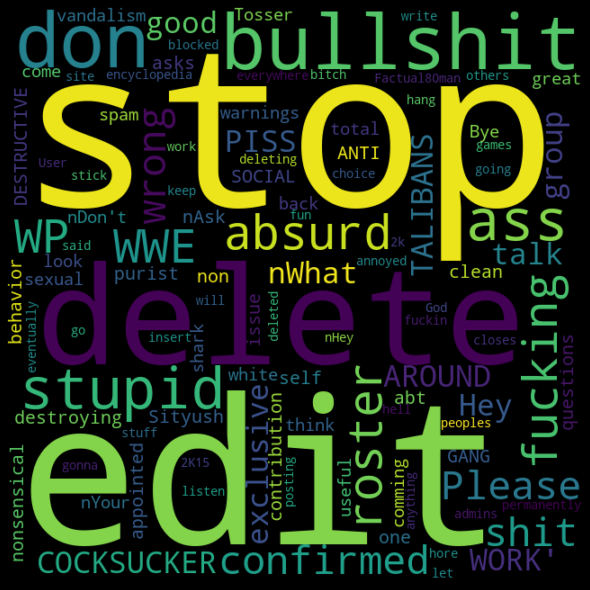

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = train_df['comment_text'].loc[(train_df['toxic']==1)|(train_df['severe_toxic']==1)|(train_df['obscene']==1)|(train_df['threat']==1)|(train_df['insult']==1)|(train_df['identity_hate']==1)].values
wordcloud = WordCloud(
    width = 640,
    height = 640,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (12, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_df["Hateful"]=np.where((train_df['toxic']==1)|(train_df['severe_toxic']==1)|(train_df['obscene']==1)|(train_df['threat']==1)|(train_df['insult']==1)|(train_df['identity_hate']==1),1,0)

In [ ]:
train_df.loc[train_df['Hateful']==1].sample(10, random_state=10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Hateful
141267,f3cff1eae9a8c5e7,WHY ARE YOU SUCH A GAY NIGGER?!?! \n\nGOD DAMN...,1,1,1,0,1,1,1
157888,e543d28a84664f5c,"""\n\nA """"warning"""" by another editor. But, who...",1,0,0,0,0,0,1
36826,6253e870fdaef543,""" The """"C"""" isn't just a logogram, like you re...",1,0,0,0,1,0,1
75592,ca3d74f0caba9ad6,Your blocks do not deter me \nI may be blocked...,1,0,1,0,1,0,1
148600,4f2f403b11b1448b,"This article is already bad enough, dont make ...",1,0,0,0,0,0,1
92050,f6123cf9383dc725,YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A...,1,1,1,0,1,0,1
131368,bed506b318169568,this is what happens when girls become admins ...,1,0,0,0,0,0,1
20161,353f7089b65aac12,"Ask me if I care, second-hander.",0,0,0,0,1,0,1
102190,22deacb3445d03e1,"Lol fred, now why on earth would I want to be ...",1,0,0,0,0,0,1
145060,16bb8c622795ce6f,"No, Really! \n\nYou're effing killing me! You...",1,0,0,0,0,0,1


In [ ]:
y = train_df['Hateful'].values
print(y)

[0 0 0 ... 0 0 0]


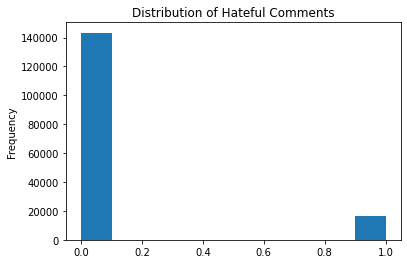

In [ ]:
train_df['Hateful'].plot(kind='hist', title='Distribution of Hateful Comments');

In [ ]:
train_df['Hateful'].value_counts()

0    143346
1     16225
Name: Hateful, dtype: int64

In [ ]:
max_features = 20000
max_text_length = 400

In [ ]:
x_tokenizer = tf.keras.preprocessing.text.Tokenizer(max_features)
x_tokenizer.fit_on_texts(list(x))
x_tokenized = x_tokenizer.texts_to_sequences(x)
x_train_val = sequence.pad_sequences(x_tokenized, maxlen=max_text_length)

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2020-10-29 09:27:43--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-10-29 09:27:43--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-10-29 09:27:43--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
embedding_dims = 100
embeddings_index = dict()
f = open('glove.6B.100d.txt')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

embedding_matrix = np.zeros((max_features, embedding_dims))
for word, index in x_tokenizer.word_index.items():
  if index > max_features -1:
    break
  else:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[index] = embedding_vector

In [ ]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features,
                    embedding_dims,
                    embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                    trainable=False))
model.add(Dropout(0.2))

Build model...


In [ ]:
filters = 250
kernel_size = 3
hidden_dims = 250

In [ ]:
from tensorflow.keras.layers import MaxPooling1D

In [ ]:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(filters,
                 5,
                 padding='valid',
                 activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         2000000   
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 250)         75250     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 250)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 250)         312750    
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               6

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y, test_size=0.15, random_state=1)

In [ ]:
batch_size = 32
epochs = 3

In [ ]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_val, y_val))

Epoch 1/3
4239/4239 [==============================] - 34s 8ms/step - loss: 0.1489 - accuracy: 0.9460 - val_loss: 0.1280 - val_accuracy: 0.9560
Epoch 2/3
4239/4239 [==============================] - 34s 8ms/step - loss: 0.1210 - accuracy: 0.9553 - val_loss: 0.1163 - val_accuracy: 0.9576
Epoch 3/3
4239/4239 [==============================] - 34s 8ms/step - loss: 0.1119 - accuracy: 0.9584 - val_loss: 0.1138 - val_accuracy: 0.9603


In [ ]:
# import tensorflow as tf
# tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
model.evaluate(x_val, y_val, batch_size=128)

In [ ]:
test_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project/test.csv')

In [ ]:
x_test = test_df['comment_text'].values

In [ ]:
x_test[0]

"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"

In [ ]:
type(x_test)

numpy.ndarray

In [ ]:
x_test_tokenized = x_tokenizer.texts_to_sequences(x_test)
x_testing = sequence.pad_sequences(x_test_tokenized, maxlen=max_text_length)

In [ ]:
y_testing = model.predict(x_testing, verbose = 1, batch_size=32)

4787/4787 [==============================] - 15s 3ms/step


In [ ]:
y_testing.shape

(153164, 1)

In [ ]:
y_testing[0]

array([0.9754767], dtype=float32)

In [ ]:
test_df['Hateful'] = ['not hateful' if x < .5 else 'hateful' for x in y_testing]
test_df[['comment_text', 'Hateful']].head(20)#.sample(20, random_state=1)

,comment_text,Hateful
0,Yo bitch Ja Rule is more succesful then you'll...,hateful
1,== From RfC == \n\n The title is fine as it is...,not hateful
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",not hateful
3,":If you have a look back at the source, the in...",not hateful
4,I don't anonymously edit articles at all.,not hateful
5,Thank you for understanding. I think very high...,not hateful
6,Please do not add nonsense to Wikipedia. Such ...,not hateful
7,:Dear god this site is horrible.,not hateful
8,""" \n Only a fool can believe in such numbers. ...",not hateful
9,== Double Redirects == \n\n When fixing double...,not hateful


In [ ]:
word_index = x_tokenizer.word_index
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(20000, 100)


In [ ]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(max_features):
  word = reverse_word_index[word_num+1]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [ ]:
model.save_weights("/content/drive/My Drive/Colab Notebooks/Project/abc.h5")

In [ ]:
model.save("/content/drive/My Drive/Colab Notebooks/Project/abc2.json")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/Project/abc2.json/assets
